**Social Nwtwork Ads dataset**

В рамках данной работы нами будет проанализирован датасет, включающий в себя пользователей социальной сети с точки зрения маркетинга.
В данном исследовании мы будем рассматривать пользователей, исследуя их по полу, возрасту и тому, купил ли пользователь показанный ему в социальной сети продукт.

In [22]:
import pandas as pd #для начала устанавливаем библиотеку pandas
data1 = pd.read_csv('Social_Network_Ads.csv') #импортируем данные датасета
data1

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [17]:
data1_tall = data1[data1['Gender'] == 'Male']
data1_tall[['User ID','Age', 'EstimatedSalary']]
#Сортируем полученные данные по половому признаку(Мужчины), смотрим соотношение по критериям возраст-доход. Данный анализ позволит нам проанализировать эстимированный доход в зависимости от возраста, что в последующем может помочь нам определить входит ли пользователь в ЦА рекламируемого продукта по уровню дохода.

,User ID,Age,EstimatedSalary
0,15624510,19,19000
1,15810944,35,20000
4,15804002,19,76000
5,15728773,27,58000
8,15600575,25,33000
...,...,...,...
390,15807837,48,33000
391,15592570,47,23000
393,15635893,60,42000
396,15706071,51,23000


In [18]:
data1.sort_values('Age', ascending=True)
#На данном этапе мы отсортировали данные по признаку возраст (от меньшего к большему) для удобства использования датасета

,User ID,Gender,Age,EstimatedSalary,Purchased
76,15746737,Male,18,52000,0
165,15578738,Female,18,86000,0
51,15764195,Female,18,44000,0
14,15628972,Male,18,82000,0
141,15666141,Female,18,68000,0
...,...,...,...,...,...
393,15635893,Male,60,42000,1
370,15611430,Female,60,46000,1
223,15593715,Male,60,102000,1
355,15606472,Male,60,34000,1


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


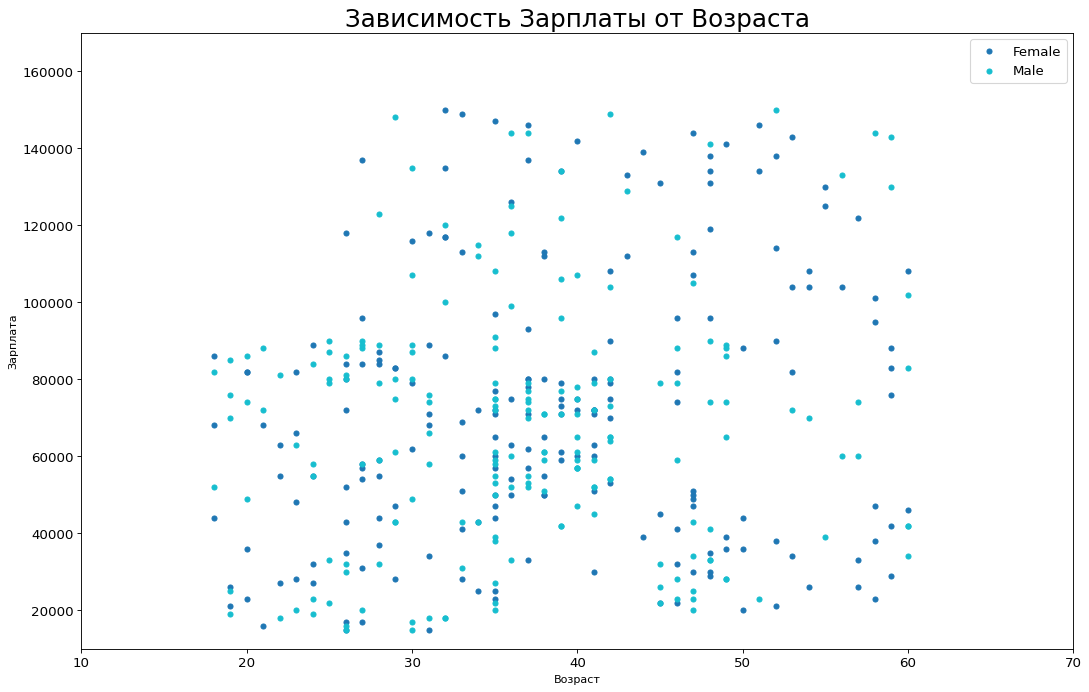

In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
categories = np.unique(data1['Gender'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('Age', 'EstimatedSalary',
            data=data1.loc[data1.Gender == category, :],
            s=20, c=colors[i], label=str(category))

plt.gca().set(xlim=(10, 70), ylim=(10000, 170000), xlabel='Возраст', ylabel='Зарплата')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Зависимость Зарплаты от Возраста", fontsize=22)
plt.legend(fontsize=12)
plt.show()
#Путем кореляции мы выявили зависимость дохода от возраста для представитлей разных полов. Здесь можем сделать предположение о том, что минимальный разброс в заработной плате между мужчинами и женщинами достигается в возрасте 35+. Данный анализ может позволить нам составить более детальный портрет ЦА, в котором мы сможем определить представители какого пола и возраста могут войти в ЦА рекламируемого товара.

In [27]:
group = data1.groupby('Age')
group.get_group(35)
#На данном этапе мы сгрупировали данные по параметру "Возраст" для более детального рассмотрения представителей данной возрастной группы.

,User ID,Gender,Age,EstimatedSalary,Purchased
1,15810944,Male,35,20000,0
9,15727311,Female,35,65000,0
35,15713144,Male,35,27000,0
42,15772798,Male,35,108000,0
53,15671655,Female,35,23000,0
83,15711218,Male,35,88000,0
89,15682268,Male,35,50000,0
95,15709441,Female,35,44000,0
96,15710257,Female,35,25000,0
98,15575694,Male,35,73000,0


In [26]:
N = data1.Age.shape[0]
sum = 0
for i in range(N):
    sum += data1.Age[i]
mean = float(sum/N)
print("Среднее значение :",mean)
Data1 = data1.sort_values('Age', ascending=True)
print("Медиана :",Data1.Age[N/2])

price_counts = {}
for p in Data1.Age:
    if p not in price_counts:
        price_counts[p] = 1
    else:
        price_counts[p] += 1

maxp = 0
mode_price = None
for k, v in price_counts.items():
    if maxp < v:
        maxp = v
        mode_price = k
print("Мода :",mode_price,"Кол-во :", maxp)

print("Меры разброса (также максимальные и минимальные значения) : ",max(Data1.Age),"; ",min(Data1.Age))

std = float(np.std(Data1.Age))
print("Стандартное отклонение : ", round(std,2))

Three = 3
o = ""
zmark = []
for i in Data1.Age:
    z = (i - mean) / std
    zmark.append((i - mean) / std)
    if z > Three:
        o += i + ", "
if o == "":
    print("Нет выбросов")
else:
    print(o)
for i in range(len(zmark)):
    print("Z-оценка [",i,"] элемента : ", round(zmark[i],2))
#На данном этапе мы рассмотрели меры центральной тенденции. Данные показли, средний возраст представителей аудитории. Далее выявили, что возраст большей части аудитории - 35 лет, представителей 35 лет - 32 человека. Также выявили минимальный и максимальный возраст представителей выборки, который составил 18 и 60 лет соотвественно. Стандартное отклонение в выборке составило 10.47. Выборосов в выборке нет.

Среднее значение : 37.655
Медиана : 35
Мода : 35 Кол-во : 32
Меры разброса (также максимальные и минимальные значения) :  60 ;  18
Стандартное отклонение :  10.47
Нет выбросов
Z-оценка [ 0 ] элемента :  -1.88
Z-оценка [ 1 ] элемента :  -1.88
Z-оценка [ 2 ] элемента :  -1.88
Z-оценка [ 3 ] элемента :  -1.88
Z-оценка [ 4 ] элемента :  -1.88
Z-оценка [ 5 ] элемента :  -1.78
Z-оценка [ 6 ] элемента :  -1.78
Z-оценка [ 7 ] элемента :  -1.78
Z-оценка [ 8 ] элемента :  -1.78
Z-оценка [ 9 ] элемента :  -1.78
Z-оценка [ 10 ] элемента :  -1.78
Z-оценка [ 11 ] элемента :  -1.78
Z-оценка [ 12 ] элемента :  -1.69
Z-оценка [ 13 ] элемента :  -1.69
Z-оценка [ 14 ] элемента :  -1.69
Z-оценка [ 15 ] элемента :  -1.69
Z-оценка [ 16 ] элемента :  -1.69
Z-оценка [ 17 ] элемента :  -1.69
Z-оценка [ 18 ] элемента :  -1.69
Z-оценка [ 19 ] элемента :  -1.59
Z-оценка [ 20 ] элемента :  -1.59
Z-оценка [ 21 ] элемента :  -1.59
Z-оценка [ 22 ] элемента :  -1.59
Z-оценка [ 23 ] элемента :  -1.5
Z-оценка [ 24 ] эле

Таким образом путем нашего анализа датасета мы приходим к выводу о том, что в наша база данных является актуальной для выявления наиболее подходящей ЦА продукта, рекламируемого в социальных сетях.